## Import libraries & notebook configuration

In [1]:
import os
import pyxdf # xdf file importation
import matplotlib.pyplot as plt
import numpy as np
import nbformat #used to call other scripts
from my_functions import *

# library for creating filters
from scipy.signal import butter, iirnotch, filtfilt, welch
#%matplotlib widget

### Ensure that the root directory is the project directory
In some cases, the root directory may not be the project directory. This is usually the case when the notebook is run from a subdirectory of the project directory.

In [2]:
# if pwd is SRC  change to root
print("Current working directory: ", os.getcwd())
if os.path.basename(os.getcwd()) == "SRC":
    os.chdir("..")
print("Current working directory: ", os.getcwd())
print(os.path.basename(os.getcwd()))

Current working directory:  c:\Users\iWiss\Documents\GitHub\Stage_Signal_Physio\SRC
Current working directory:  c:\Users\iWiss\Documents\GitHub\Stage_Signal_Physio
Stage_Signal_Physio


In [3]:
plt.close("all")  # close all figure windows

## Initialization

### Xdf file selection and loading (REARM data)

In [4]:
# Define the xdf file of interest
xdf_input_filename="001_MolLud_20201112_1_c.xdf"
#xdf_filename="020_DesMar_20211129_1_c.xdf"

xdf_input_filepath=os.path.normpath("DAT/INPUT/"+xdf_input_filename)

### Convert xdf eeg data to csv

In [5]:
#option to process the signal before export to csv (detrending,rereferencing,filtering) (bool)
PROCESS_SIGNAL= True

#Execute the exportation of the EEG data in xdf file to csv, returns output filename
csv_input_filename = export_xdf_eeg_to_csv(xdf_input_filepath,PROCESS_SIGNAL) 


Input filepath:  DAT\INPUT\001_MolLud_20201112_1_c.xdf
Input filename:  001_MolLud_20201112_1_c
PROCESS_SIGNAL ? -- True
Processing signals
Detrending...
input_signals shape:
 (221938, 8)
input_signals mean per signal:
 [27897.195 26144.139 28026.402 35319.527 31324.672 24827.713 32372.799
 29788.95 ]
Rereferencing...
input_signals shape:(221938, 8)
input_signals whole mean:13.818697929382324
Filtering...
LOW_CUTOFF_FREQ_THEORETICAL=5,HIGH_CU-TOFF_FREQ_THEORETICAL=100
LOW_CUTOFF_FREQ_CORRECTED=4.732,HIGH_CUTOFF_FREQ_CORRECTED=104.203
NOTCH_CUTOFF_FREQ=50
Filtered signal shape: (221938, 8)
EEG_for_export shape : (221938, 8)
export data header : Channel_1:C4, Channel_2:FC2, Channel_3:FC6, Channel_4:CP2, Channel_5:C3, Channel_6:FC1, Channel_7:FC5, Channel_8:CP1,time(sec)
Input filepath : DAT\INPUT\001_MolLud_20201112_1_c.xdf
Output filepath : DAT\INPUT\001_MolLud_20201112_1_c_prepro_499.998_Hz.csv


### Load corresponding csv file

In [6]:
csv_input_filepath=os.path.normpath("DAT/INPUT/"+csv_input_filename)
print(csv_input_filepath)
EEG_data= np.genfromtxt(csv_input_filepath, delimiter=',',skip_header=1)

DAT\INPUT\001_MolLud_20201112_1_c_prepro_499.998_Hz.csv


### Tidy data

In [7]:
EEG_amplitudes=EEG_data[:,0:8] #first 8 columns are channels
EEG_times=EEG_data[:,8] #last is absolute time in sec
Srate=500
N=len(EEG_amplitudes)

## PSD estimation results : Electrode C3 and C4 

In [8]:
# definition of the EEG channels' names
channels_dict = {"Channel_1": "C4",
                "Channel_2": "FC2",
                "Channel_3": "FC6",
                "Channel_4": "CP2",
                "Channel_5": "C3",
                "Channel_6": "FC1",
                "Channel_7": "FC5",
                "Channel_8": "CP1"}

### Electrode selection

In [9]:
# Selection of electrodes to study
SELECT_CHANNEL_NUMBERS=np.array([1,5])

### PSD estimations over entire signals

selected channels :
channel number:1, channel index:0
Channel_1_C4
channel number:5, channel index:4
Channel_5_C3
matlab psd results file names: ['MATLAB_PSD_res_EEG_Channel_1_C4_001_MolLud_20201112_1_c_prepro_499.998_Hz.csv', 'MATLAB_PSD_res_EEG_Channel_5_C3_001_MolLud_20201112_1_c_prepro_499.998_Hz.csv']
channel name: Channel_1_C4
001_MolLud_20201112_1_c_prepro_499.998_Hz.csv
 MATLAB_PSD_res_EEG_Channel_1_C4_001_MolLud_20201112_1_c_prepro_499.998_Hz.csv 
 Channel_1_C4
N:  221938
duration:  443.876
time_vector shape:  (221938,)
signal_frequency_vector before crop len:110970,half_val: 125.00112644071767
signal_frequency_vector last freq : 250.0
./DAT/OUTPUT/Matlab_PSD_Results/MATLAB_PSD_res_EEG_Channel_1_C4_001_MolLud_20201112_1_c_prepro_499.998_Hz.csv <class 'str'>
len psd matlab fft:110970
channel name: Channel_5_C3
001_MolLud_20201112_1_c_prepro_499.998_Hz.csv
 MATLAB_PSD_res_EEG_Channel_5_C3_001_MolLud_20201112_1_c_prepro_499.998_Hz.csv 
 Channel_5_C3
N:  221938
duration:  443.876


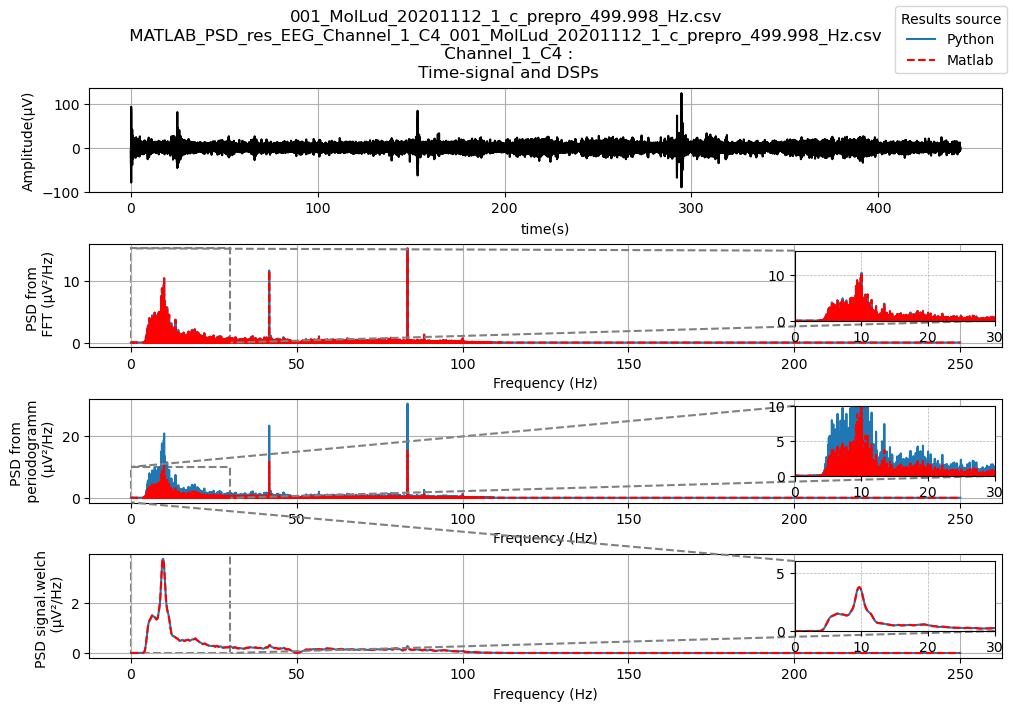

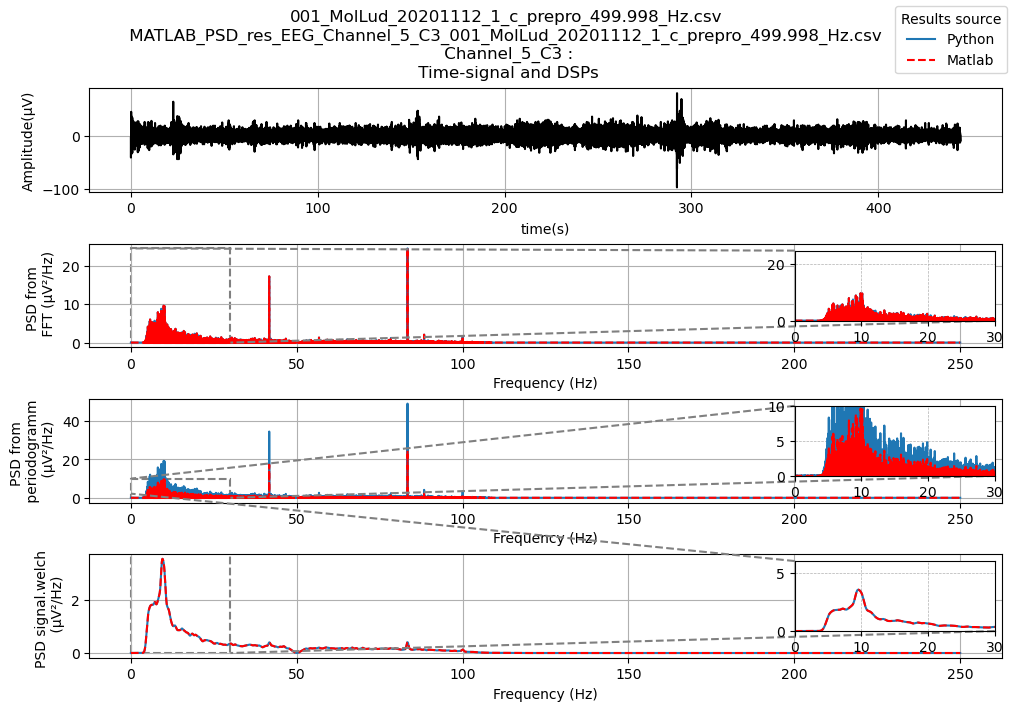

In [10]:
PSD_results=plot_multi_signal_time_dsps(multi_channel_signals=EEG_amplitudes, sample_rate=Srate,
                                channels_dict=channels_dict, selected_channel_numbers=SELECT_CHANNEL_NUMBERS,
                                input_signal_filename=csv_input_filename)

### <span style="color:red">Analysis</span>

### PSD estimations over rest and task period

{'Channel_1': 'C4', 'Channel_2': 'FC2', 'Channel_3': 'FC6', 'Channel_4': 'CP2', 'Channel_5': 'C3', 'Channel_6': 'FC1', 'Channel_7': 'FC5', 'Channel_8': 'CP1'}
MARKERS LEN: 12
(110970, 12)


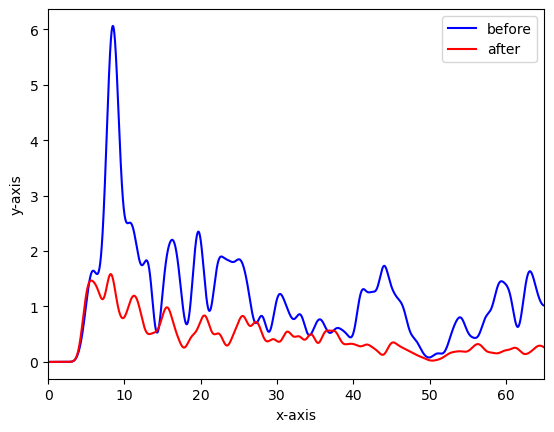

In [11]:
print(channels_dict)
# recuperer le signal d'une electrode (c3/c4)
Channel_num=5 #electrode C4
Channel_index=Channel_num-1
electrode_signal=EEG_amplitudes[:,Channel_index] 
# recuperer les marqueurs d'evenements
markers_array=create_marker_times_labels_array(xdf_input_filepath=xdf_input_filepath)
nearest_markers_array=nearest_timestamps_array_finder(EEG_times_stamps=EEG_times,markers=markers_array)
array_from_dict = np.array(list(nearest_markers_array.values()))

TIME_WINDOW=4 #each task lasts for 20s
# segmenter le signal en portions taches/ repos

# calculer le spectre de chaque portion de signal (tache repos)
before_all = compute_welch_on_a_signal_before_each_marker(electrode_signal, sample_rate=Srate, 
                                                  markers_array=nearest_markers_array, segment_duration=TIME_WINDOW) #over TIME_WINDOW sec before each marker
after_all  = compute_welch_on_a_signal_after_each_marker(electrode_signal, sample_rate=Srate, 
                                                  markers_array=nearest_markers_array, segment_duration=TIME_WINDOW) #over TIME_WINDOW sec before each marker

marker_num=1 #1er marker=111
marker_index=marker_num-1
markeri_before_freq=before_all["PSD_frequencies"][:,marker_index]
markeri_before_psd=before_all["PSD_magnitudes"][:,marker_index]
markeri_after_freq=after_all["PSD_frequencies"][:,marker_index]
markeri_after_psd=after_all["PSD_magnitudes"][:,marker_index]
# moyenner les spectres respectifs des portions taches/repos
print(before_all["PSD_frequencies"].shape)

#afficher le spectre d'une tache pour une electrode

plt.figure()
plt.plot(markeri_before_freq, markeri_before_psd, label='before', color='blue')

# Plot the second set of data on the same figure
plt.plot(markeri_after_freq, markeri_after_psd, label='after', color='red')
plt.xlim(0,65)

# Add legend and labels
plt.legend()
plt.xlabel('x-axis')
plt.ylabel('y-axis')

# Show the plot
plt.show()
# afficher le spectre moyen tache d'une electrode
# afficher le spectre moyen repos d'une electrode



In [12]:
nearest_markers_array2=np.column_stack(nearest_markers_array.values())
epoched_signals=extract_data_epochs(signal=electrode_signal,sample_rate=Srate,markers_labels_times=nearest_markers_array,select_events=(111,100),epoch_limits=(0,4))

event structure type: <class 'dict'>
n_points_before_marker:0 - n_points_after_marker:2000
first_seg_coord: 13500 - second_seg_coord: 15500
first_seg_coord: 33500 - second_seg_coord: 35500
first_seg_coord: 53500 - second_seg_coord: 55500
first_seg_coord: 83000 - second_seg_coord: 85000
first_seg_coord: 103000 - second_seg_coord: 105000
first_seg_coord: 123000 - second_seg_coord: 125000
signal_segments shape: (2001, 6)
first_seg_coord: 23500 - second_seg_coord: 25500
first_seg_coord: 43500 - second_seg_coord: 45500
first_seg_coord: 63500 - second_seg_coord: 65500
first_seg_coord: 93000 - second_seg_coord: 95000
first_seg_coord: 113000 - second_seg_coord: 115000
first_seg_coord: 133000 - second_seg_coord: 135000
signal_segments shape: (2001, 6)


C:\Users\iWiss\AppData\Local\Temp\ipykernel_520\3348271784.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  nearest_markers_array2=np.column_stack(nearest_markers_array.values())
c:\Users\iWiss\Documents\GitHub\Stage_Signal_Physio\SRC\my_functions.py:882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  array_markers_labels_times=np.column_stack(markers_labels_times.values())


In [23]:
print(epoched_signals["label_111"].shape)
print(epoched_signals["label_100"].shape)

segments111=epoched_signals["label_111"][:,0:6] #Only 3 trials compose the 1st block (left arm) that interest us for electrode C4 (right hemisphere)
segments100=epoched_signals["label_100"] #all 6 trials as the rest periods are the same
N=len(segments111) #both epoched signals have the same duration/length

frequencies111,mean_pxx111=compute_averaged_psds_over_trials(segments111,sample_rate=Srate,nfft=N)
frequencies100,mean_pxx100=compute_averaged_psds_over_trials(segments100,sample_rate=Srate,nfft=N)

(2001, 6)
(2001, 6)
segment shapes - (2001, 6)
segment shapes - (2001, 6)


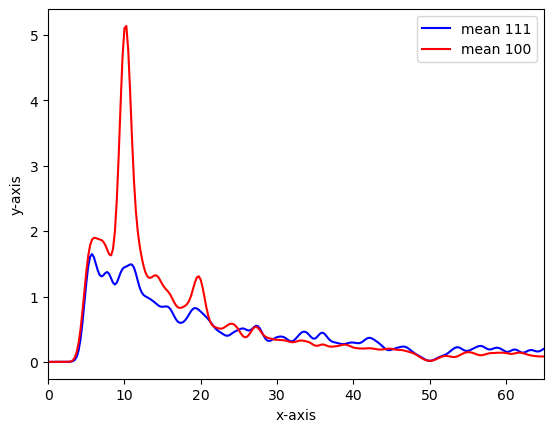

In [22]:
plt.figure()
plt.plot(frequencies111, mean_pxx111, label='mean 111', color='blue')

# Plot the second set of data on the same figure
plt.plot(frequencies100, mean_pxx100, label='mean 100', color='red')
plt.xlim(0,65)

# Add legend and labels
plt.legend()
plt.xlabel('x-axis')
plt.ylabel('y-axis')

# Show the plot
plt.show()

## PSD results verification whole signal (matlab vs python)

### Root mean square error (RMSE) of the difference between the python and matlab distributions for each PSD estimation method

In [15]:
for i in SELECT_CHANNEL_NUMBERS:
    channel=f"Channel_{i}"
    channel_fullname=f"{channel}_{channels_dict[channel]}"
    print(channel_fullname)
    # for a channel compute the rms of the difference of two series and print the results
    rms_fft=rms(PSD_results[channel_fullname]["Python_PSD_results"]["PSD_FFT"]["psds"],PSD_results[channel_fullname]["Matlab_PSD_results"]["PSD_FFT"]["psds"],f"rms_fft_{channel}")
    rms_p=rms(PSD_results[channel_fullname]["Python_PSD_results"]["PSD_P"]["psds"],PSD_results[channel_fullname]["Matlab_PSD_results"]["PSD_P"]["psds"],f"rms_p_{channel}")
    rms_w=rms(PSD_results[channel_fullname]["Python_PSD_results"]["PSD_W"]["psds"],PSD_results[channel_fullname]["Matlab_PSD_results"]["PSD_W"]["psds"],f"rms_w_{channel}")

Channel_1_C4
rms_fft_Channel_1 =  3.6247687850490767e-16  (µV²/Hz)
rms_p_Channel_1 =  0.2710671988422232  (µV²/Hz)
rms_w_Channel_1 =  5.684910983384439e-16  (µV²/Hz)
Channel_5_C3
rms_fft_Channel_5 =  4.211471387563797e-16  (µV²/Hz)
rms_p_Channel_5 =  0.3118374395365743  (µV²/Hz)
rms_w_Channel_5 =  6.502954090375546e-16  (µV²/Hz)


## Absolute difference between Python and maltab PSD results for each estimation method

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


iter= 0
Channel_1_C4


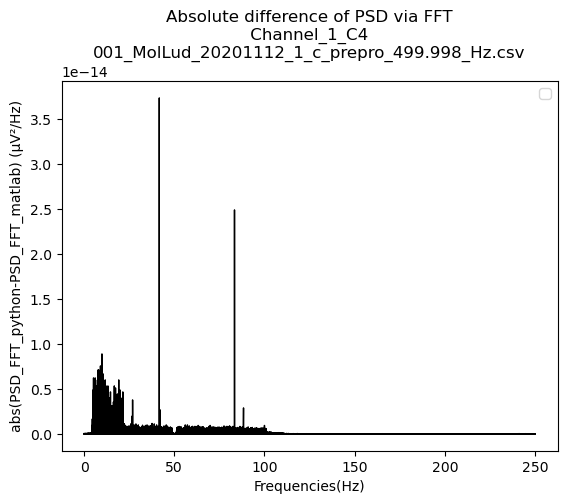

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


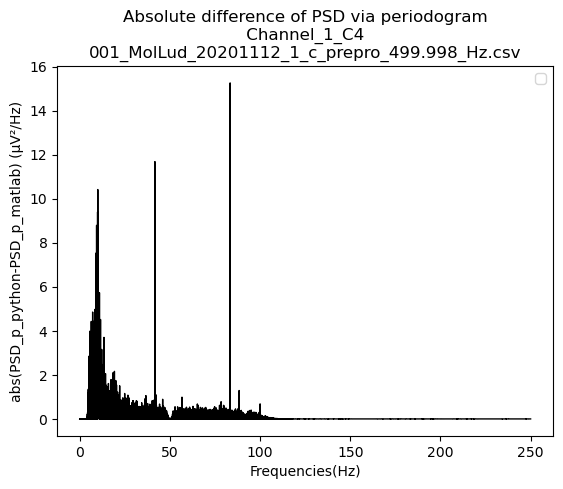

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


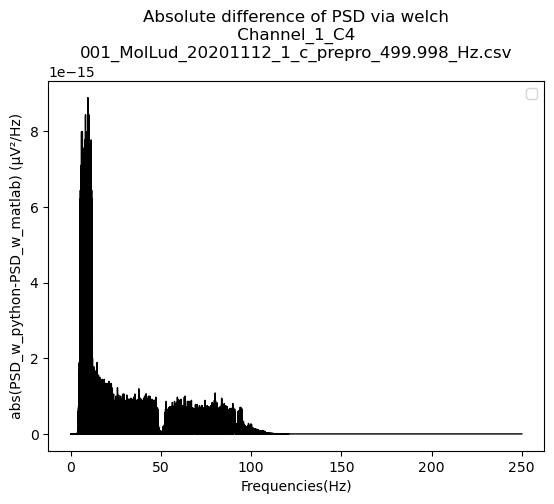

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


iter= 1
Channel_5_C3


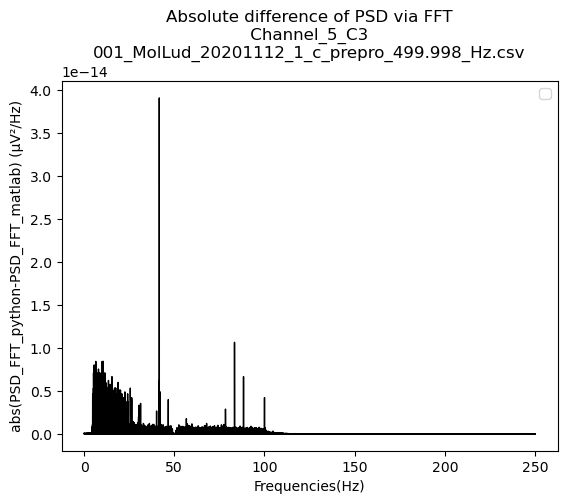

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


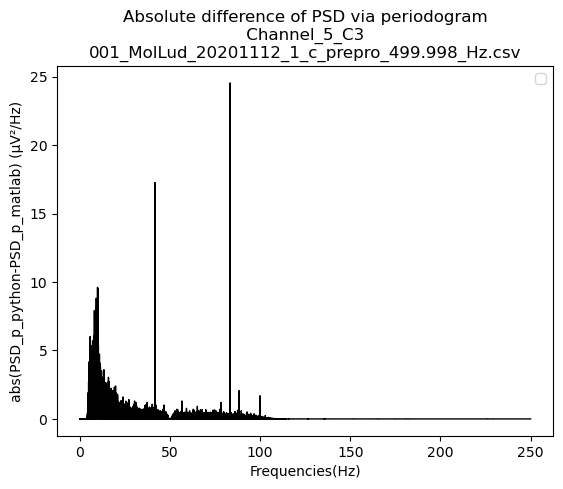

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


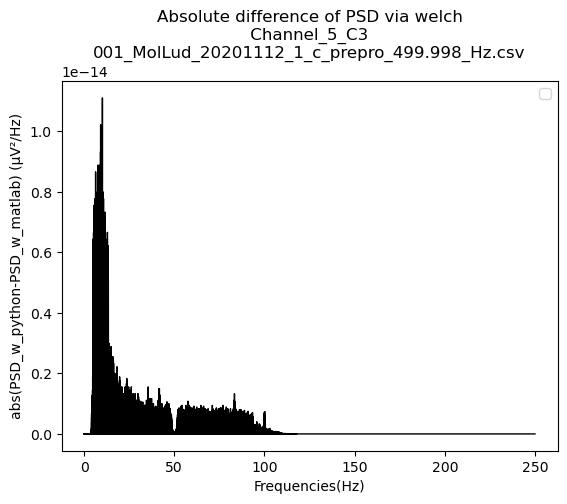

In [16]:
dict={}
for iter,i in enumerate(SELECT_CHANNEL_NUMBERS):
    print("iter=",iter)
    channel=f"Channel_{i}"
    channel_fullname=f"{channel}_{channels_dict[channel]}"
    print(channel_fullname)
    # for a channel compute the absolute difference of two series and print the results
    absdiff_fft=abs_distance(PSD_results[channel_fullname]["Python_PSD_results"]["PSD_FFT"]["psds"],PSD_results[channel_fullname]["Matlab_PSD_results"]["PSD_FFT"]["psds"])
    absdiff_p=abs_distance(PSD_results[channel_fullname]["Python_PSD_results"]["PSD_P"]["psds"],PSD_results[channel_fullname]["Matlab_PSD_results"]["PSD_P"]["psds"])
    absdiff_w=abs_distance(PSD_results[channel_fullname]["Python_PSD_results"]["PSD_W"]["psds"],PSD_results[channel_fullname]["Matlab_PSD_results"]["PSD_W"]["psds"])

    #plot the absolute differences of psd estimations for a given electrode
    single_plot(csv_input_filename,
            x=PSD_results[channel_fullname]["Python_PSD_results"]["PSD_FFT"]["frequencies"],y=absdiff_fft,
            fig_title=f"Absolute difference of PSD via FFT\n {channel_fullname} ",
            ylabel="abs(PSD_FFT_python-PSD_FFT_matlab) (µV²/Hz)",
            xlabel="Frequencies(Hz)")
    single_plot(csv_input_filename,
            x=PSD_results[channel_fullname]["Python_PSD_results"]["PSD_P"]["frequencies"],y=absdiff_p,
            fig_title=f"Absolute difference of PSD via periodogram\n {channel_fullname} ",
            ylabel="abs(PSD_p_python-PSD_p_matlab) (µV²/Hz)",
            xlabel="Frequencies(Hz)")
    single_plot(csv_input_filename,
            x=PSD_results[channel_fullname]["Python_PSD_results"]["PSD_W"]["frequencies"],y=absdiff_w,
            fig_title=f"Absolute difference of PSD via welch\n {channel_fullname} ",
            ylabel="abs(PSD_w_python-PSD_w_matlab) (µV²/Hz)",
            xlabel="Frequencies(Hz)")